Using pandas, matplotlib and numpy: 

Filter data so that only the drop itself is included : Use Plot for verification

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
ten_to_one_df = pd.read_csv('10 to 1 Data.csv')
ten_times_one_df = pd.read_csv('10x1 Data.csv')

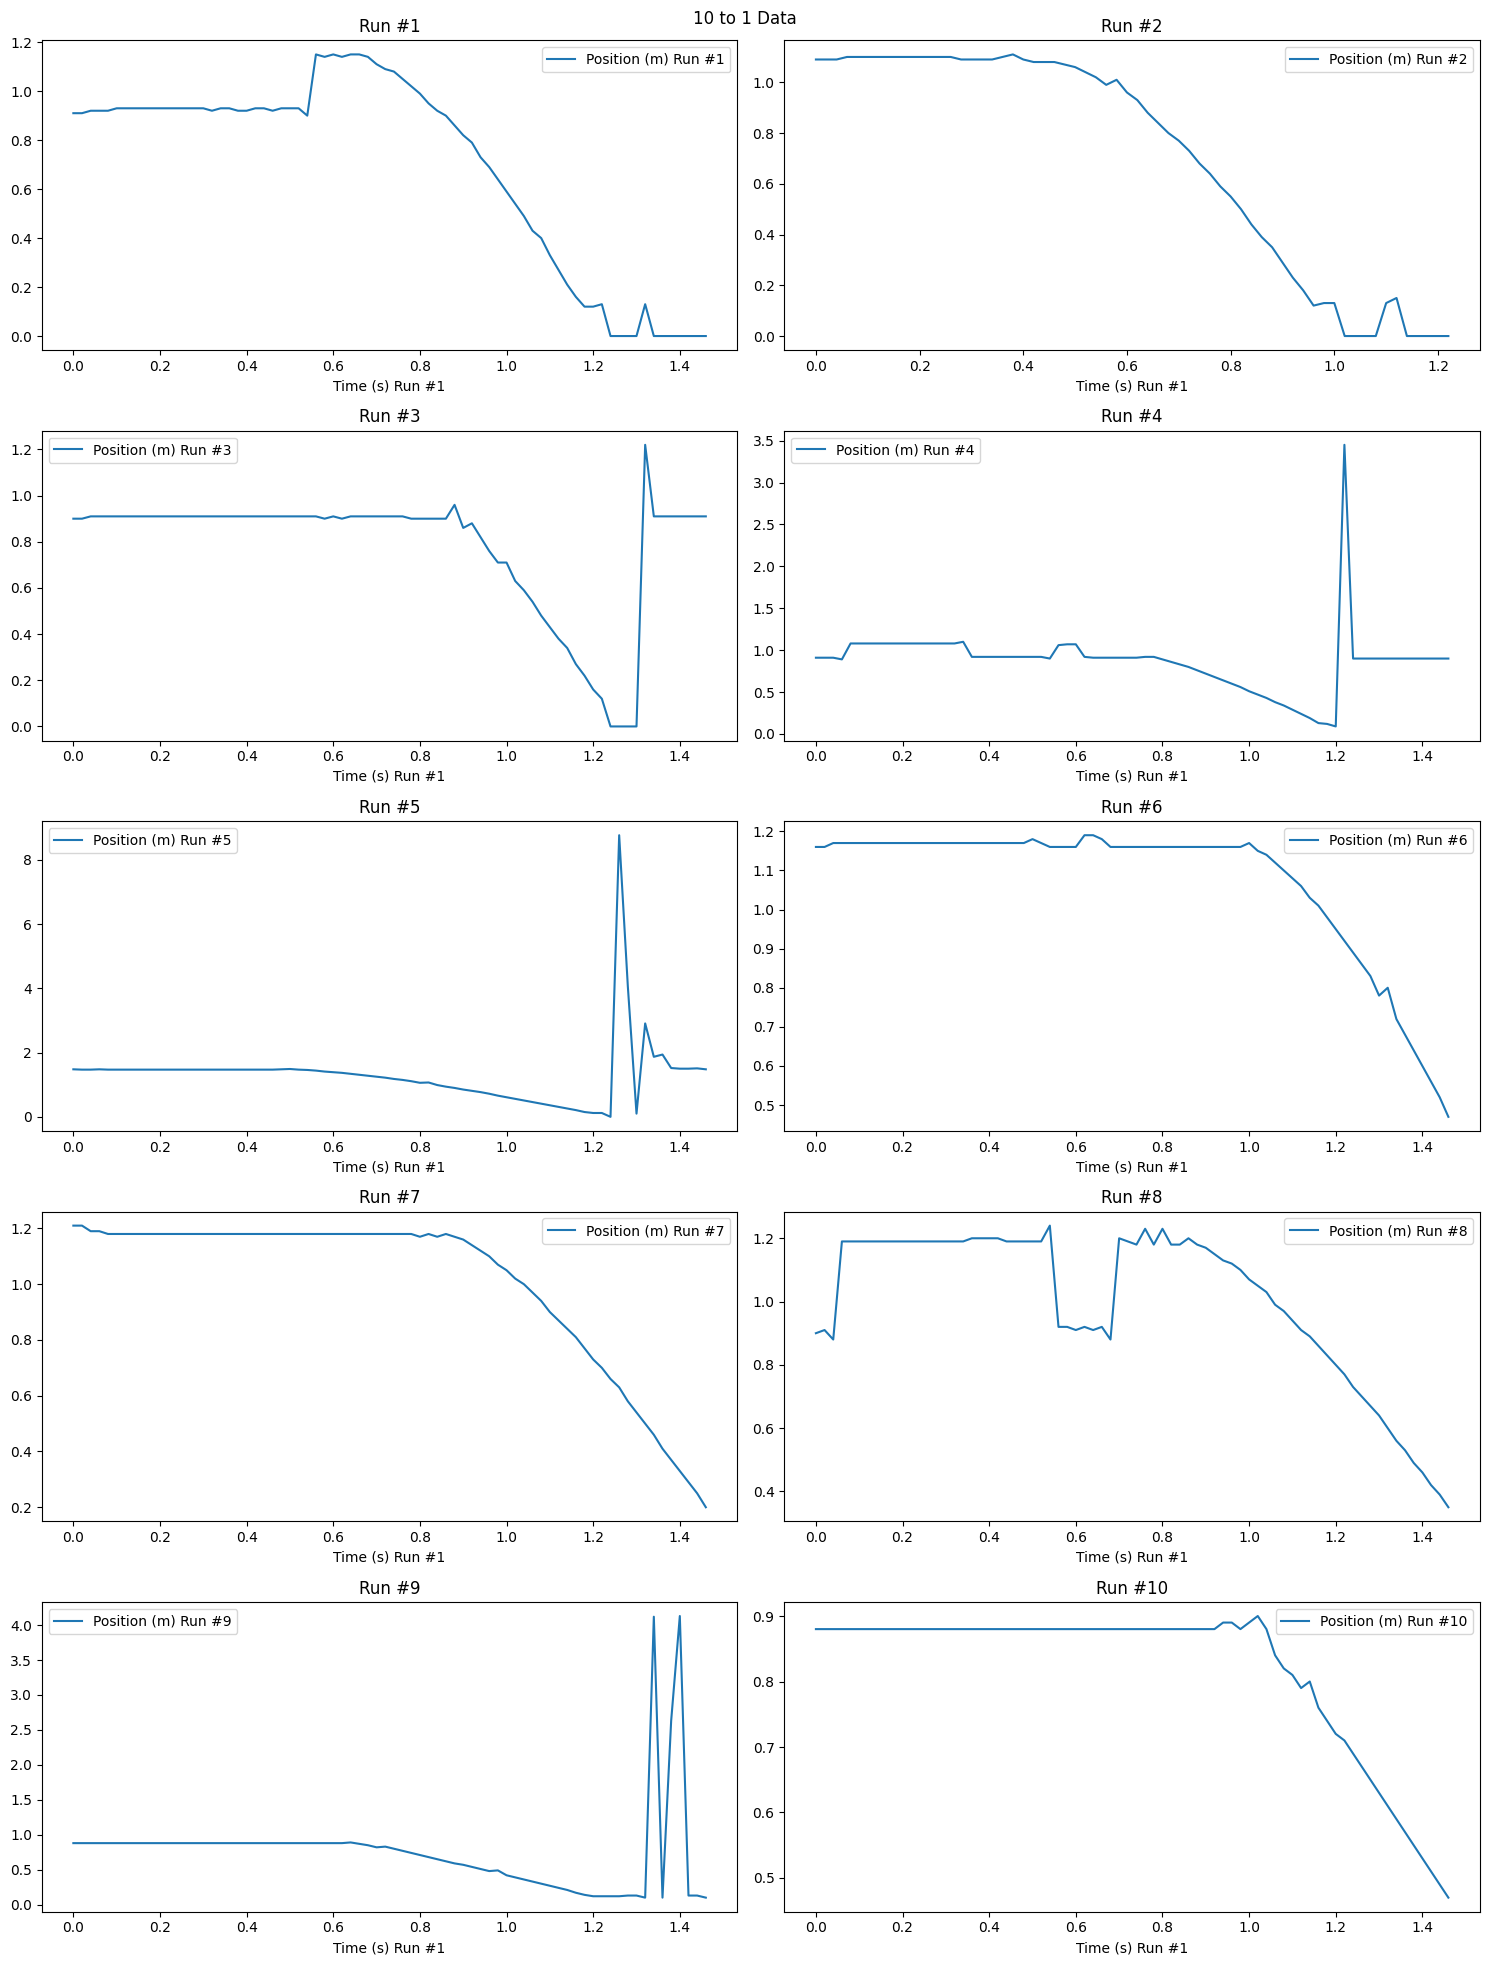

In [17]:
# Plot the initial data
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(10):
    ten_to_one_df.plot(x='Time (s) Run #1', y=f'Position (m) Run #{i+1}', ax=axs[i//2, i%2], title=f'Run #{i+1}')
plt.tight_layout()
plt.show()

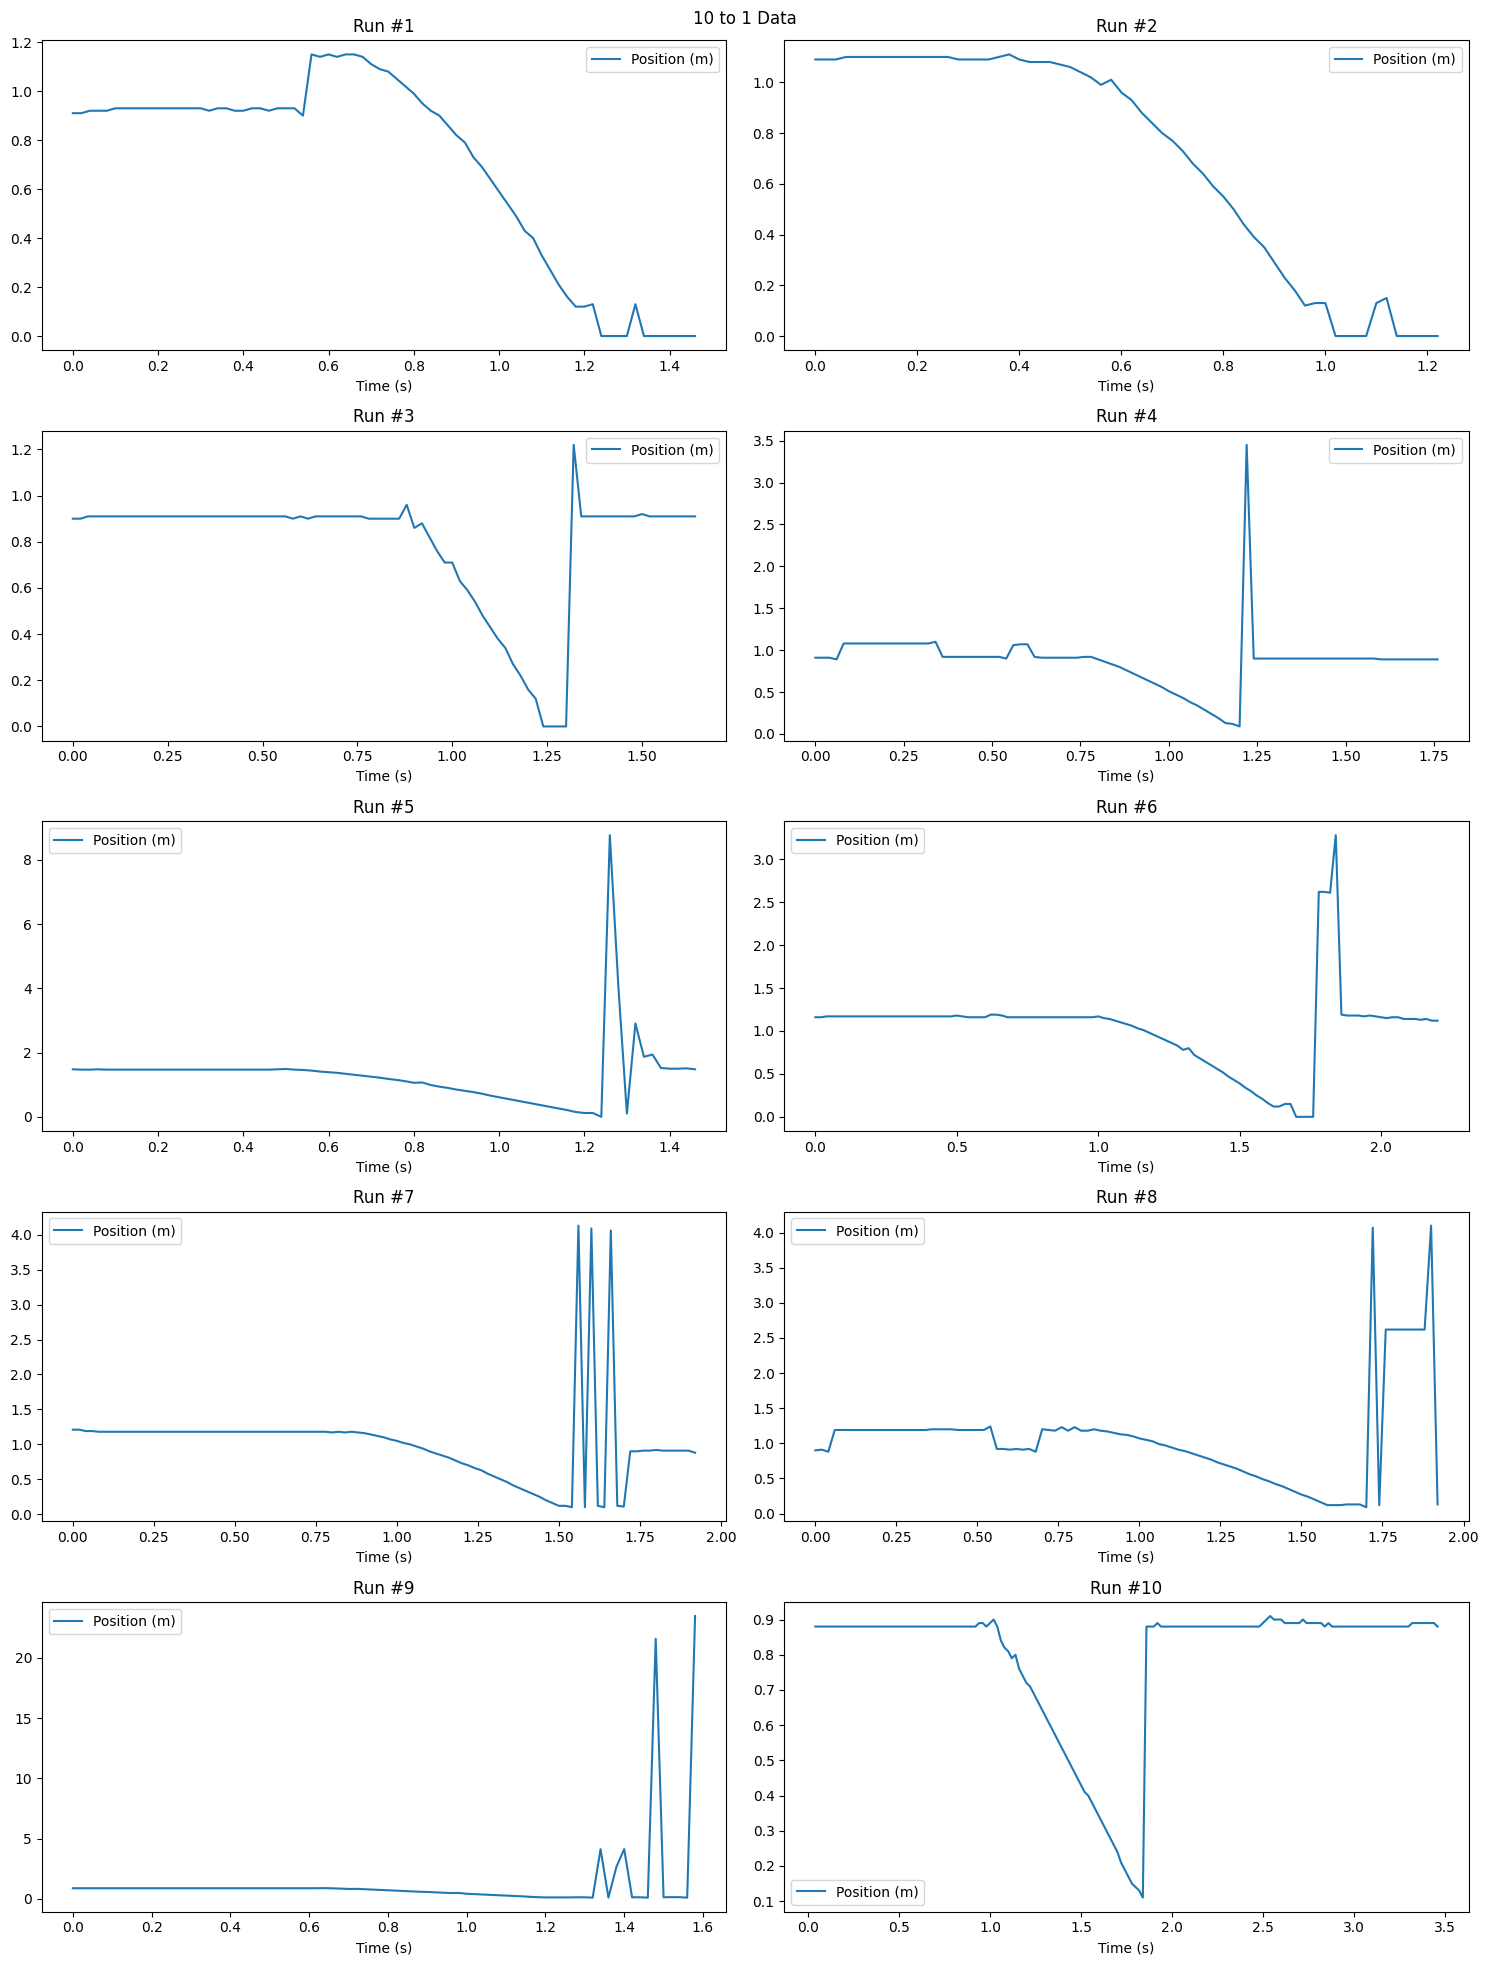

In [19]:
# Splice so that everything after the minimum value is removed

min_values = []
for i in range(1, 11):
    run_df = ten_to_one_df[[f'Time (s) Run #{i}', f'Position (m) Run #{i}']].dropna()
    min_values.append(run_df[f'Position (m) Run #{i}'].min())

# Function that goes through a run and starts from the minimum value of the data and goes 
# backwards to find the time where the data was at a maximum value. Then keep up to 1 second 
# of data after the maximum value and filter out the rest of the data after that point.
KEEP = 1
filtered_ten_to_one_df = []
def filter_data(run_df):
    min_index = run_df['Position (m)'].idxmin()
    max_index = run_df['Position (m)'][:min_index].idxmax()
    max_time = run_df['Time (s)'][max_index]
    run_df = run_df[run_df['Time (s)'] > max_time - KEEP]
    return run_df

# Plot the data for each run after filtering, using the filter_data function, mapping the 
# Position (m) column to the y axis and the Time (s) column to the x axis.
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
plt.suptitle('10 to 1 Data')
for i in range(1, 11):
    run_df = ten_to_one_df[[f'Time (s) Run #{i}', f'Position (m) Run #{i}']].dropna()
    run_df.columns = ['Time (s)', 'Position (m)']
    run_df = filter_data(run_df)
    run_df.plot(x='Time (s)', y='Position (m)', ax=axs[(i - 1) // 2, (i - 1) % 2])
    axs[(i - 1) // 2, (i - 1) % 2].set_title(f'Run #{i}')

plt.tight_layout()
plt.show()